# Sentimental analysis and classification using IMDb dataset and LSTM

Performing Sentiment Analysis on the IMDB data set to accurately identify the sentiment of the text .

In [ ]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Importing Libraries

In [ ]:
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense, Dropout

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [ ]:
# reading the IMDB data set into a dataframe

df = pd.read_csv("IMDB Dataset.csv")

In [ ]:
# Top 5 rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Tokenization of text into words

In [ ]:
text=df['review'][0]
print(text)
print("====================")
print(word_tokenize(text))


One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

Pre-processing of Text data

In [ ]:
corpus=[]
for text in df['review']:
    words= [word.lower() for word in word_tokenize(text)]
    corpus.append(words)


In [ ]:
num_words = len(corpus)
print(num_words)

50000


In [ ]:
df.shape

(50000, 2)

Splitting Data into Train and Test (80%-20%)

In [ ]:
train_size= int(df.shape[0]*0.8)

In [ ]:
train_size

40000

In [ ]:
X_train = df.review[:train_size]
y_train = df.sentiment[:train_size]
X_test = df.review[train_size:]
y_test = df.sentiment[train_size:]

Initiation of Tokenizer into training data

In [ ]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(X_train)

Preprocessing

In [ ]:
X_train= tokenizer.texts_to_sequences(X_train)
X_train= pad_sequences(X_train,maxlen=128,truncating ='post', padding='post')

In [ ]:
X_test= tokenizer.texts_to_sequences(X_test)
X_test= pad_sequences(X_test,maxlen=128,truncating ='post', padding='post')

In [ ]:
X_train[0],len(X_train[0])

(array([   27,     4,     1,    80,  2102,    45,  1073,    12,   100,
          147,    39,   316,  2968,   409,   459,    26,  3173,    33,
           23,   200,    14,    11,     6,   614,    48,   606,    16,
           68,     7,     7,     1,    87,   148,    12,  3256,    68,
           41,  2968,    13,    92,  5626,     2, 16202,   134,     4,
          569,    60,   271,     8,   200,    36,     1,   673,   139,
         1712,    68,    11,     6,    21,     3,   118,    15,     1,
         7870,  2257,    38, 11540,    11,   118,  2495,    54,  5662,
           16,  5182,     5,  1438,   377,    38,   569,    92,     6,
         3730,     8,     1,   360,   353,     4,     1,   673,     7,
            7,     9,     6,   431,  2968,    14,    12,     6,     1,
        11736,   356,     5,     1, 14689,  6526,  2594,  1087,     9,
         2661,  1432,    20, 22583,   534,    32,  4795,  2451,     4,
            1,  1193,   117,    29,     1,  6893,    25,  2874, 12191,
      

In [ ]:
X_test[0],len(X_test[0])

(array([   87,   122,    10,   180,     5,   132,    12,    10,  7131,
         3717,    20,     1,  1001,  2285,     2,    10,   255,     1,
           17,  2431,    10,  1311,     5,   103,     1,   222,  6349,
            4,     3,    19,    11,    17,   974,     3,   351,     5,
          215,  1011,   415,     9,    13,   215,  1380,    56,   235,
          402,   300,     4,   316,    23,   257,    19,   961,    12,
        22250,    12,    33,    66,    61,   212,    53,    16,    11,
          113,    13,   497,     2,     1,   102,    70,  5358,    15,
            1,    88,   172,     1,   473,   824,     8,     1,    64,
           67,    54,    49,  2406,    30,    29,    33,    90,    40,
        35787,    83,    46,   438,     4,     3,    74,   220,     2,
           10,   115,    21,    63,    12,    30,    29,   268,    10,
         1059,   137,    10,    78,    21,   119,    28,    13,     1,
           88,   175,     5,   728,  3423,   108,     8,     1,    17,
      

In [ ]:
print(X_train.shape,y_train.shape)


(40000, 128) (40000,)


In [ ]:
print(X_test.shape, y_test.shape)

(10000, 128) (10000,)


Label- Encoding - transforming categorical to numerical variables

In [ ]:
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)




Tried creating a model with the below dimensions and loss function but faced overfitting issue .HENCE, later applied regularization to reduce the problem of overfitting.

In [ ]:
#model=Sequential()
#model.add(Embedding(input_dim=num_words, output_dim=100, input_length=128, trainable=True))
#model.add(LSTM(100,dropout=0.1,return_sequences=True))
#model.add(LSTM(100,dropout=0.1,return_sequences=True))
#model.add(LSTM(100,dropout=0.1,return_sequences=False))
#model.add(Dense(1,activation='tanh'))
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])##





In [ ]:
from keras import regularizers
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

Sequential Model is created.Previously , we have tried out multiple times compiling model with layers and differnt rates of drop out & activation function, but have encountered the overfitting issue of validation error.  
Hence,in order to resolve the overfitting issue following changes were done :
addition of batch normalization to LSTM layers to normalize the inputs
drop out rate incresed to 0.2 
addition of kernel regularizers

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=num_words, output_dim=100, input_length=128, trainable=True))
model.add(LSTM(100, dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LSTM(100, dropout=0.2, return_sequences=True, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LSTM(100, dropout=0.2, return_sequences=False, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(1,activation='tanh'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

callbacks=[EarlyStopping(monitor='val_loss', patience=3)]


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 128, 100)          5000000   
                                                                 
 lstm_6 (LSTM)               (None, 128, 100)          80400     
                                                                 
 batch_normalization_3 (Batc  (None, 128, 100)         400       
 hNormalization)                                                 
                                                                 
 lstm_7 (LSTM)               (None, 128, 100)          80400     
                                                                 
 batch_normalization_4 (Batc  (None, 128, 100)         400       
 hNormalization)                                                 
                                                                 
 lstm_8 (LSTM)               (None, 100)              

In [ ]:
history= model.fit(X_train,y_train,epochs=10, batch_size=64, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/10
625/625 [==============================] - 508s 799ms/step - loss: 6.0465 - accuracy: 0.5418 - val_loss: 5.6395 - val_accuracy: 0.5808
Epoch 2/10
625/625 [==============================] - 490s 784ms/step - loss: 3.9357 - accuracy: 0.5559 - val_loss: 3.4831 - val_accuracy: 0.5821
Epoch 3/10
625/625 [==============================] - 493s 789ms/step - loss: 3.4677 - accuracy: 0.5833 - val_loss: 2.9465 - val_accuracy: 0.6102
Epoch 4/10
625/625 [==============================] - 506s 810ms/step - loss: 2.8023 - accuracy: 0.6339 - val_loss: 2.7374 - val_accuracy: 0.5003
Epoch 5/10
625/625 [==============================] - 504s 807ms/step - loss: 2.4274 - accuracy: 0.5926 - val_loss: 2.2519 - val_accuracy: 0.5207
Epoch 6/10
625/625 [==============================] - 504s 806ms/step - loss: 1.9533 - accuracy: 0.6960 - val_loss: 2.0908 - val_accuracy: 0.5022
Epoch 7/10
625/625 [==============================] - 505s 807ms/step - loss: 2.0994 - accuracy: 0.6610 - val_loss: 7.3622 -

In [ ]:
#plt.figure(figsize=(16,5))
#epochs=range(1,len(history.history['accuracy'])+1)
#plt.plot(epochs,history.history['loss'])
#plt.plot(epochs,history.history['val_loss'])
# plt.legends()
#plt.show()

NameError: ignored

<Figure size 1152x360 with 0 Axes>

Results: Graph reflecting the validation and training error .

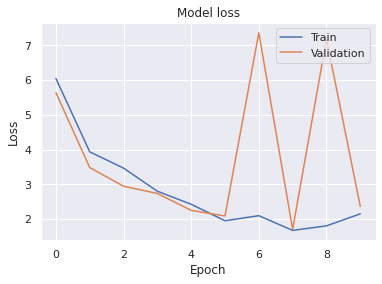

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()